# Quick start with Jupyter

We suggest that the user first gets familiarized with the accepted [syntax](Syntax)

In [1]:
from clingraph import Clingraph

## Basic usage

### Create a clingraph from string

In [2]:
g = Clingraph()
g.add_fact_string('''
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"Andres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").''')
g.compute_graphs()

'default'

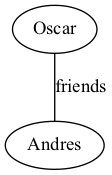

In [3]:
g

##### Print a clingraph source code

In [4]:
print(g.source())

//----------default----------
graph default {
	oscar [label=Oscar]
	andres [label=Andres]
	oscar -- andres [label=friends]
}



##### Get the graphviz object

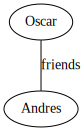

In [5]:
g.get_graphviz()

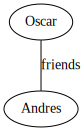

In [6]:
g.get_graphviz('default')

### Create a clingraph from file

The file contents representing two different graphs

In [8]:
%%bash
cat ../examples/basic/example2/example_2.lp

    graph(toms_family).
    graph(bills_family).

    node(tom, toms_family).
    node(max, toms_family).
    edge((tom, max), toms_family).

    node(bill, bills_family).
    node(jen, bills_family).
    edge((bill, jen), bills_family).


##### Load the facts in the file

In [12]:
g = Clingraph()
g.add_fact_file("../examples/basic/example2/example_2.lp")

##### Add additional facts from a string and show the graph

'toms_family'

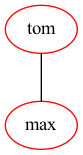

'bills_family'

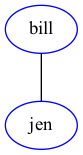

In [13]:
g.add_fact_string("attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).")
g.compute_graphs()
g

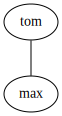

In [7]:
g.graphs['toms_family']

##### Show source of one graph

In [8]:
print(g.graphs['toms_family'].source)

graph toms_family {
	tom
	max
	tom -- max
}



##### Save all graphs 

In [9]:
g.save(directory="out",format="pdf")

## Clingo integration

### Create a clingraph from each model in the clingos solve

In [4]:
from clingraph import MultiModelClingraph
from clingo import Control
ctl = Control(["-n2"])
g = MultiModelClingraph()
ctl.add("base", [], "1{node(a);node(b)}1.")
ctl.ground([("base", [])])
ctl.solve(on_model=g.add_model)
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

// Graph hasn't been computed yet

//=========================
//	Model: 2 Costs: [] 
//=========================

// Graph hasn't been computed yet



In [5]:
g.compute_graphs()

In [6]:
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

//----------default----------
graph default {
	a
}

//=========================
//	Model: 2 Costs: [] 
//=========================

//----------default----------
graph default {
	b
}



##### Print the clingraphs obtained for each model

In [8]:
g.clingraphs

{1: {'clingraph': <clingraph.clingraph.Clingraph at 0x106553c40>,
  'name': 'model-0001',
  'costs': []},
 2: {'clingraph': <clingraph.clingraph.Clingraph at 0x104b7baf0>,
  'name': 'model-0002',
  'costs': []}}

##### Obtain the clingraph for the first model

'default'

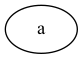

In [12]:
g.get_clingraph(1)

##### Obtain the climgraph for the second model

'default'

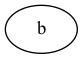

In [13]:
g.get_clingraph(2)

##### Show the source code of the first model

In [15]:
print(g.source(selected_models=['1']))


//=========================
//	Model: 1 Costs: [] 
//=========================

//----------default----------
graph default {
	a
}



In [17]:
print(g.get_clingraph(2).source())

//----------default----------
graph default {
	b
}

